<table class="MsoTableGrid" border="1" cellspacing="0" cellpadding="0" width="100%" style="border-collapse:collapse;border:none;">
 <tbody>
  <tr>
   <td style="border:solid windowtext 1.0pt;background:#D9D9D9;padding:5px;"><b>Project</b></td>
   <td style="border:solid windowtext 1.0pt;border-left:none;padding:5px;">Predictive Analysis for Heart Disease Related Fatalities</td>
   <td style="border:solid windowtext 1.0pt;background:#D9D9D9;padding:5px;"><b>Developer</b></td>
   <td style="border:solid windowtext 1.0pt;border-left:none;padding:5px;">Patrick Ryan</td>
  </tr>
  <tr>
   <td style="border:solid windowtext 1.0pt;background:#D9D9D9;padding:5px;"><b>Tools</b></td>
   <td style="border:solid windowtext 1.0pt;border-left:none;padding:5px;">Python 3.12</td>
   <td style="border:solid windowtext 1.0pt;background:#D9D9D9;padding:5px;"><b>Version</b></td>
   <td style="border:solid windowtext 1.0pt;border-left:none;padding:5px;">[pre-release] v1</td>
  </tr>
  <tr>
   <td colspan="4" style="border:solid windowtext 1.0pt;background:#D9D9D9;padding:5px;"><b>Description</b></td>
  </tr>
  <tr>
   <td colspan="4" style="border:solid windowtext 1.0pt;padding:5px;">The aim of this project is to develop a machine learning model to predict the probability of mortality, caused by heart failure using clinical parameters. This model will help in identifying patients at higher risk and eight healthcare professionals, and making informed decisions.</td>
  </tr>
  <tr>
   <td colspan="4" style="border:solid windowtext 1.0pt;background:#D9D9D9;padding:5px;"><b>Libraries and Modules</b></td>
  </tr>
  <tr>
   <td colspan="4" style="border:solid windowtext 1.0pt;padding:5px;">
    <ul>
     <li>Data Handling and Computation Libraries: pandas, numpy</li>
     <li>Machine Learning and Data Preprocessing Libraries: scikit-learn</li>
     <li>Visualization Libraries: matplotlib.pyplot, seaborn, IPython</li>
     <!-- Will add more libraries and modules here as needed -->
    </ul>
   </td>
  </tr>
  <tr>
   <td colspan="4" style="border:solid windowtext 1.0pt;background:#D9D9D9;padding:5px;"><b>Functions</b></td>
  </tr>
  <tr>
   <td colspan="4" style="border:solid windowtext 1.0pt;padding:5px;">
    <ol>
     <li>load_data: To load data into a DataFrame And get a count of rows and columns.</li>
     <li>identify_data_types: Differentiates between numerical and categorical data columns.</li>
     <li>exploratory_data_analysis: Identifies features with missing values and correlation with the target variable. Shows descriptive statistics for numerical features.</li>
     <!-- Will add more functions here as needed -->
    </ol>
   </td>
  </tr>
  <tr>
   <td colspan="4" style="border:solid windowtext 1.0pt;background:#D9D9D9;padding:5px;"><b>Main Workflow</b></td>
  </tr>
  <tr>
   <td colspan="4" style="border:solid windowtext 1.0pt;padding:5px;">
    <ul>
     <li>Setup:</li>
     <li>Data Loading:</li>
     <li>EDA:</li>
     <li>Data Preprocessing:</li>
     <li>Model Building:</li>
     <li>Model Evaluation:</li>
     <!-- Will add more steps here as needed -->
    </ul>
   </td>
  </tr>
  <!-- Can add more sections here as needed -->
 </tbody>
</table>


In [70]:
# Basic data manipulation and numerical operations
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Logging and utilities
import logging  # For logging information during execution

# Data visualization
import matplotlib.pyplot as plt  # For plotting graphs and charts
import seaborn as sns  # For making statistical graphics
from IPython.display import display, HTML # For displaying outputs in HTML

In [71]:
def load_data(data):
    try:
        df = pd.read_csv(data)
        # Get the count of rows and columns
        rows, cols = df.shape
        # Create data frame for the count of rows and columns
        counts_df = pd.DataFrame([{'Number of Rows': rows, 'Number of Columns': cols}])
        # Display the DataFrame as an HTML table
        display(HTML(counts_df.to_html(index=False, na_rep='', justify='left', border=0)))
    except (FileNotFoundError, pd.errors.EmptyDataError, pd.errors.ParserError) as e:
        logging.error(f"Error: {str(e)}.")
        exit(1)
    return df

In [72]:
def identify_data_types(df, unique_value_threshold=10):
    numerical_columns = []  # Initialize a list to store names of numerical columns
    categorical_columns = []  # Initialize a list to store names of categorical columns

    for column in df.columns:
        if df[column].dtype == 'object' or df[column].nunique() <= unique_value_threshold:
            # Add column to categorical list if it's of object type or has unique values below threshold
            categorical_columns.append(column)
        else:
            # Otherwise, consider it a numerical column
            numerical_columns.append(column)

    # Create a DataFrame for displaying information
    max_len = max(len(numerical_columns), len(categorical_columns))
    # Create a balanced list for display
    display_numerical = numerical_columns + [None] * (max_len - len(numerical_columns))
    display_categorical = categorical_columns + [None] * (max_len - len(categorical_columns))

    comparison_df = pd.DataFrame({'Numerical Columns': display_numerical,'Categorical Columns': display_categorical})

    # Display the DataFrame as an HTML table
    display(HTML(comparison_df.to_html(index=False, na_rep='', justify='left', border=0)))

    # Return the original lists without None values for further analysis
    return numerical_columns, categorical_columns



In [92]:
def exploratory_data_analysis(dataframe, numerical_columns, categorical_columns, target_column='HeartDisease'):
    # Feature Correlation Analysis
    correlation = dataframe[numerical_columns].corrwith(dataframe[target_column]).abs()
    correlation_html = "<h3>Feature Correlation with " + target_column + ":</h3>" + \
                        correlation.sort_values(ascending=False).to_frame('Correlation').to_html()
    display(HTML(correlation_html))
    
    # Descriptive Statistics
    descriptive_stats_html = "<h3>Descriptive Statistics for Numerical Columns:</h3>" + \
                             dataframe[numerical_columns].describe().to_html()
    display(HTML(descriptive_stats_html))

    # Missing Values Analysis
    all_columns = numerical_columns + categorical_columns + [target_column]
    missing_values = dataframe[all_columns].isna().sum()
    missing_percentage = (missing_values / len(dataframe)) * 100
    missing_df = pd.DataFrame({'Number of Missing Values': missing_values, 'Percentage': missing_percentage})
    missing_values_html = "<h3>Missing Values Analysis:</h3>" + missing_df.to_html()
    display(HTML(missing_values_html))

    # Distribution of Numerical Features
    for column in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(dataframe[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()

    # Box Plot for Numerical Features to detect outliers
    for column in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=dataframe[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

    # Distribution of Categorical Features
    for column in categorical_columns:
        print(f'\n{column} - Unique Values: {dataframe[column].nunique()}')
        plt.figure(figsize=(10, 4))
        sns.countplot(y=dataframe[column], order = dataframe[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.show()

    # Association between Categorical Features and Target
    for column in categorical_columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(x=column, hue=target_column, data=dataframe)
        plt.title(f'{column} vs {target_column}')
        plt.show()

In [93]:
def main():
    # Loading the dataset
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: left; background-color: #4d6a8f; color: #CCCCCC;">
        <h1>Loading the dataset</h1>
    </div>
    """))
    df = load_data("heart.csv")

    # Identifying data types
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: left; background-color: #4d6a8f; color: #CCCCCC;">
        <h1>Identifying data types</h1>
    </div>
    """))
    numerical_cols, categorical_cols = identify_data_types(df)
    
    # Performing EDA
    display(HTML("""
    <div style="padding:5px; margin:10px; text-align: left; background-color: #4d6a8f; color: #CCCCCC;">
        <h1>Performing EDA</h1>
    </div>
    """))
    exploratory_data_analysis(df, numerical_cols, categorical_cols)

Number of Rows,Number of Columns
918,12


Numerical Columns,Categorical Columns
Age,Sex
RestingBP,ChestPainType
Cholesterol,FastingBS
MaxHR,RestingECG
Oldpeak,ExerciseAngina
None,ST_Slope
None,HeartDisease


,Correlation
Oldpeak,0.403951
MaxHR,0.400421
Age,0.282039
Cholesterol,0.232741
RestingBP,0.107589


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


,Number of Missing Values,Percentage
Age,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
MaxHR,0,0.0
Oldpeak,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
ExerciseAngina,0,0.0


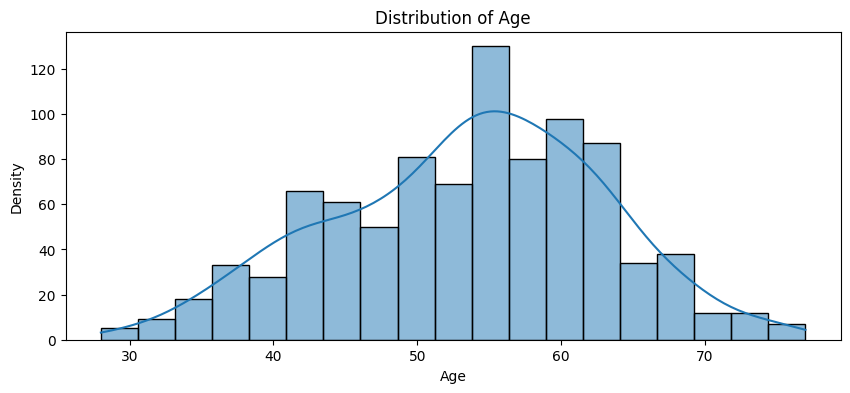

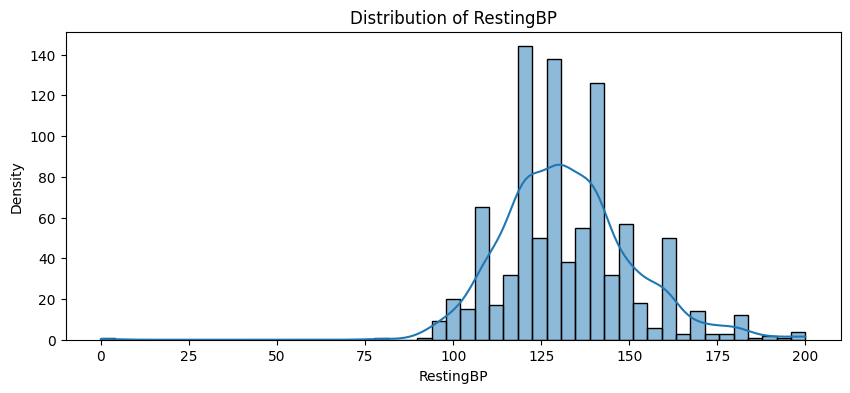

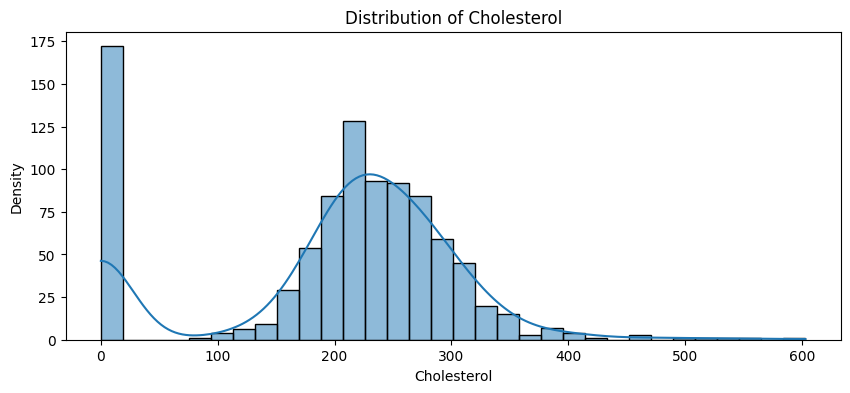

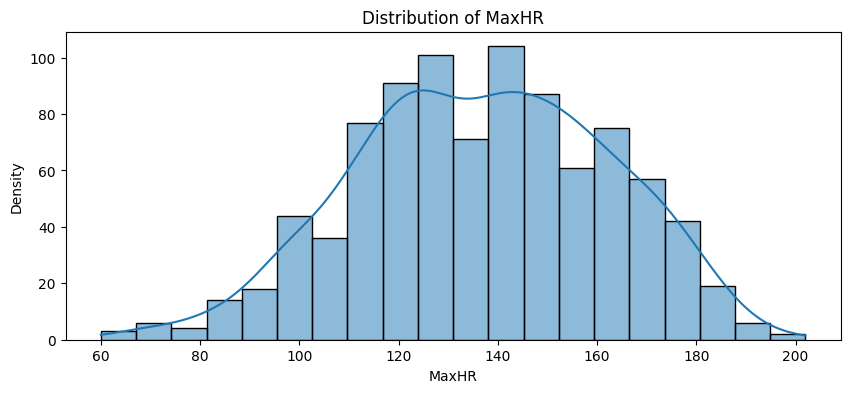

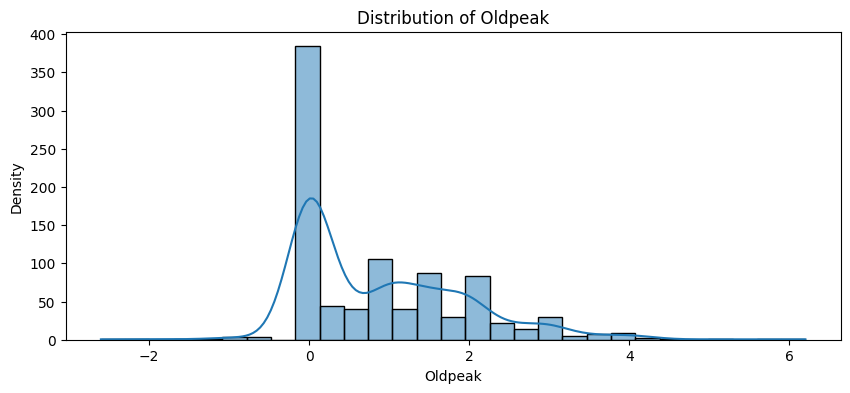

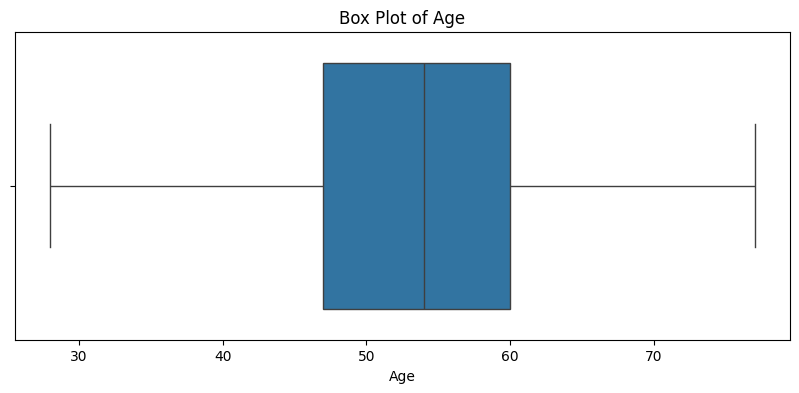

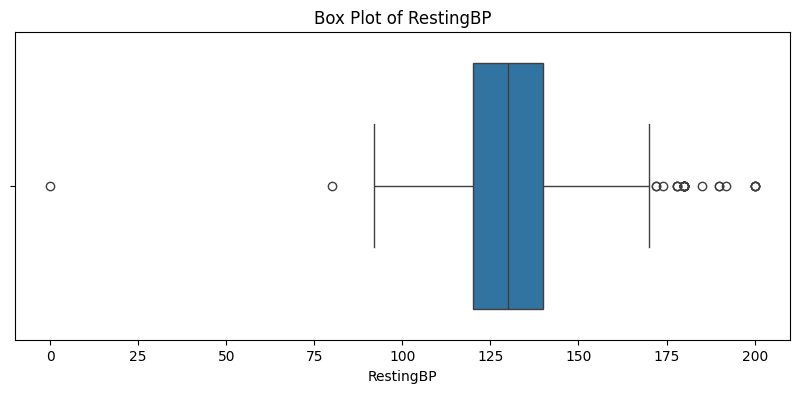

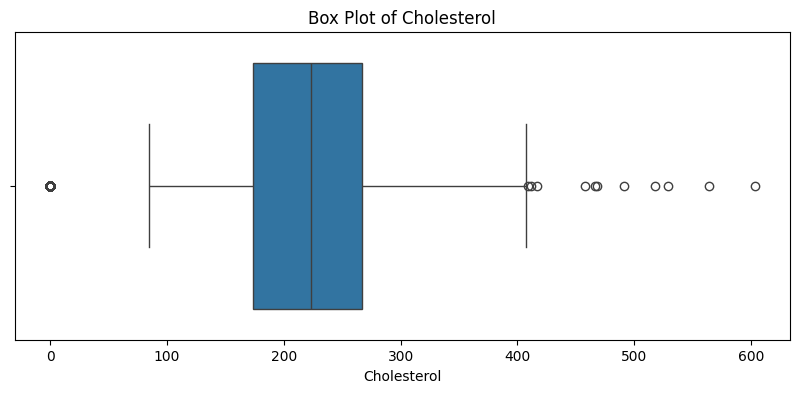

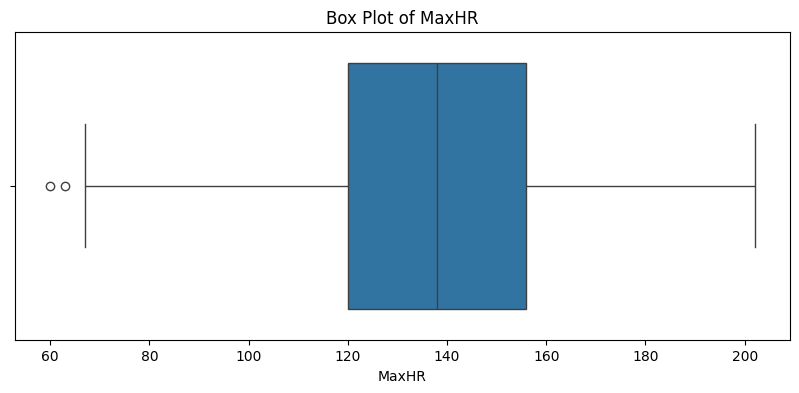

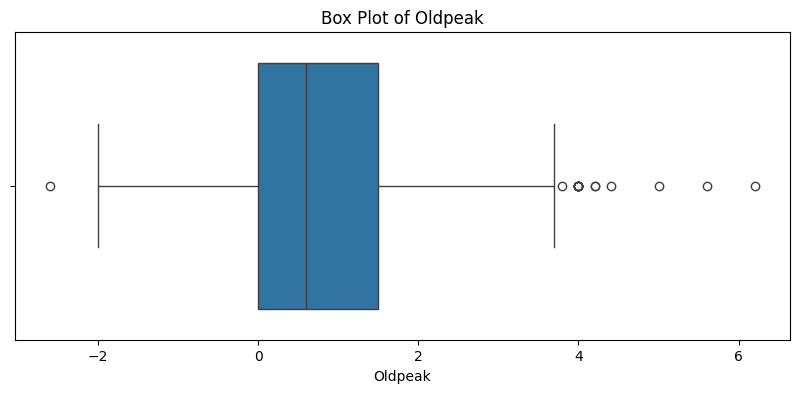


Sex - Unique Values: 2


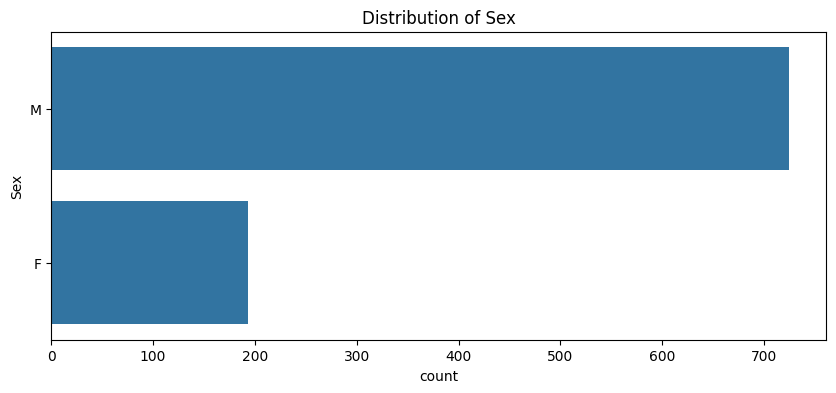


ChestPainType - Unique Values: 4


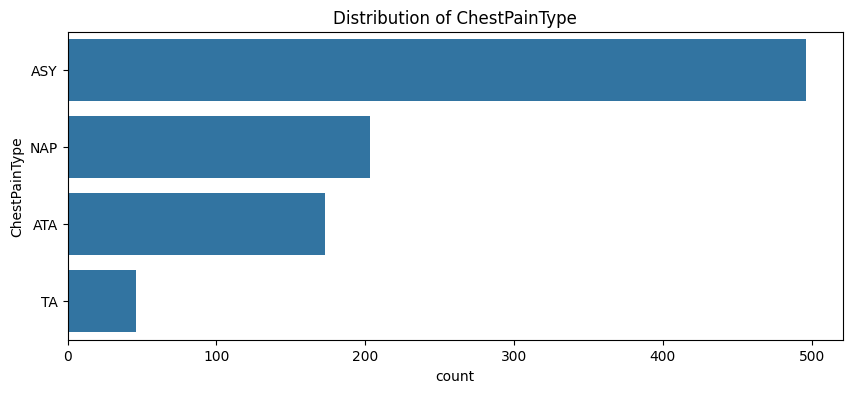


FastingBS - Unique Values: 2


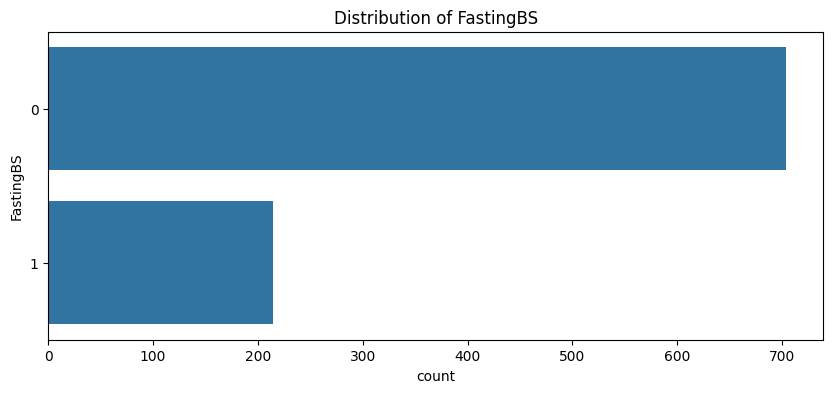


RestingECG - Unique Values: 3


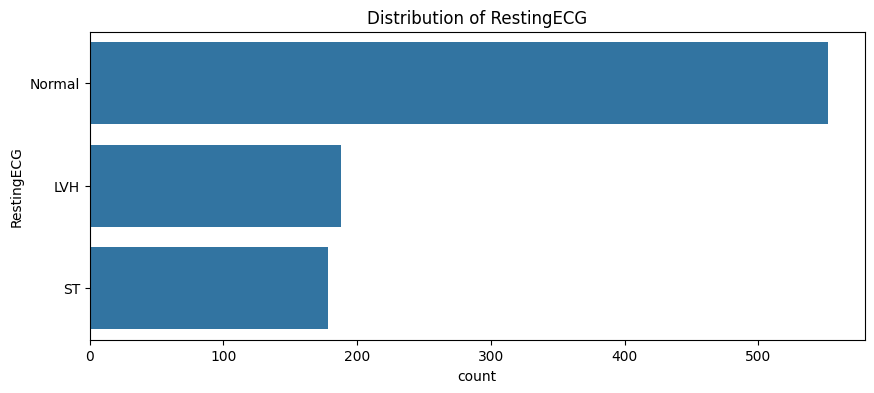


ExerciseAngina - Unique Values: 2


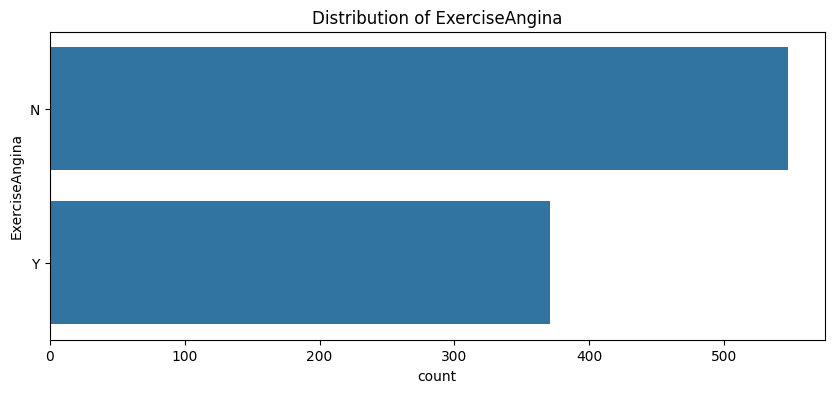


ST_Slope - Unique Values: 3


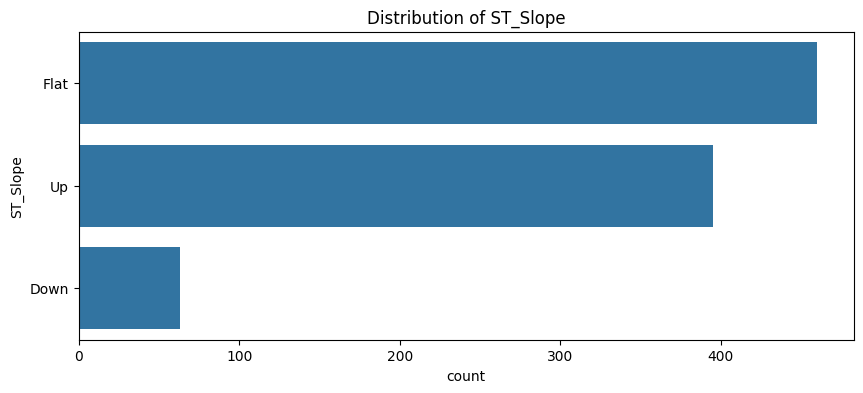


HeartDisease - Unique Values: 2


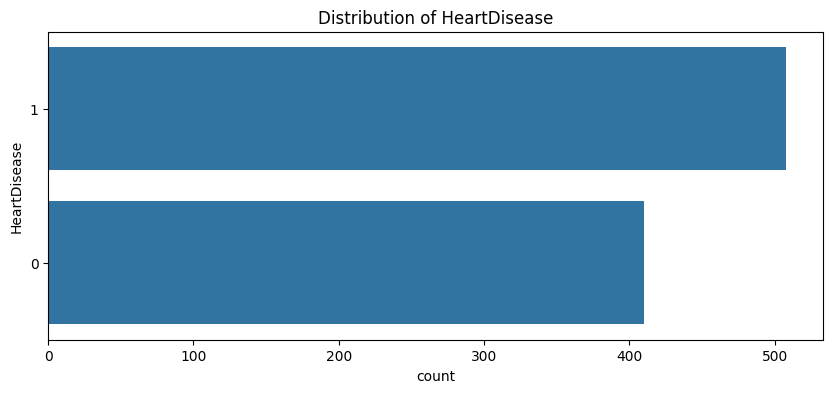

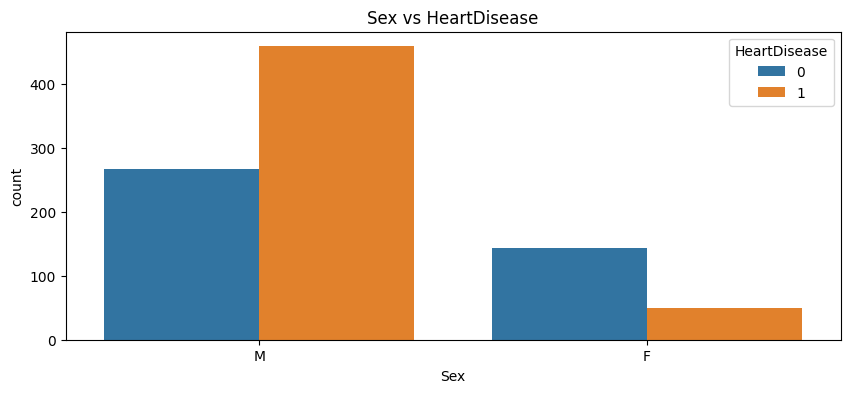

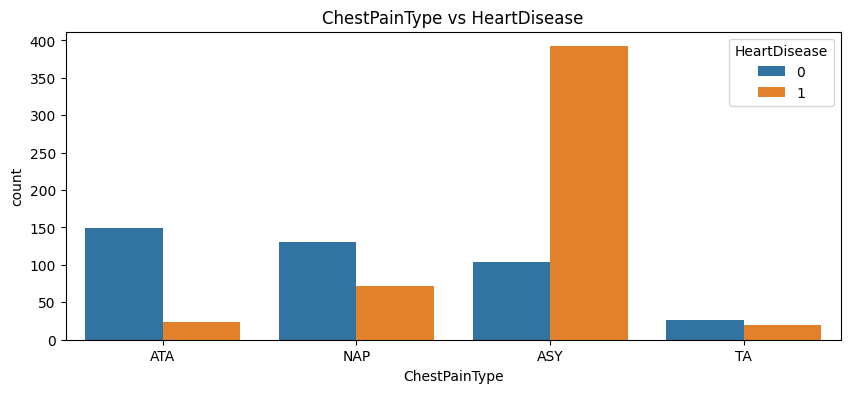

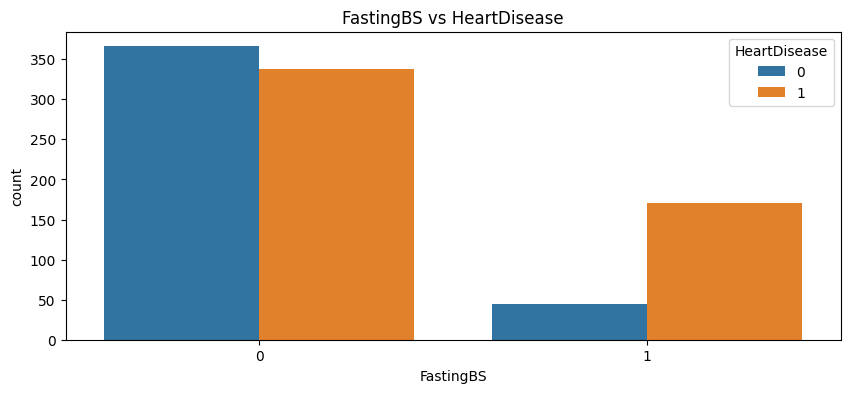

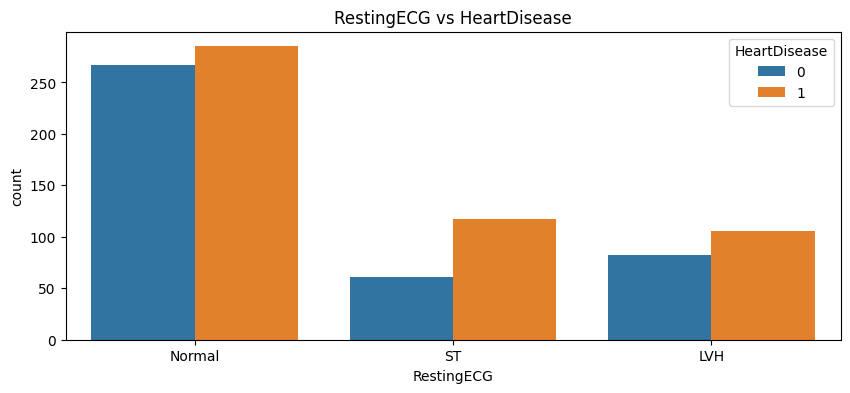

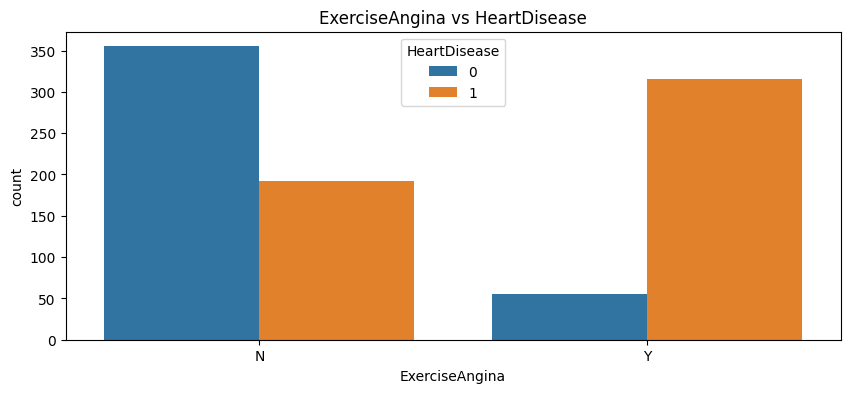

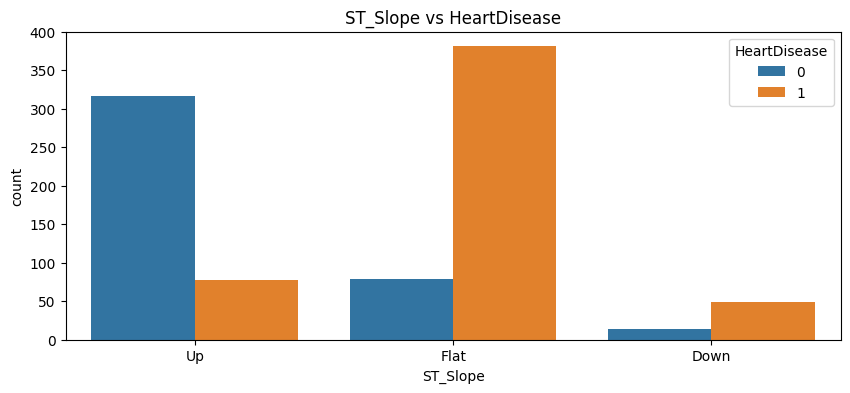

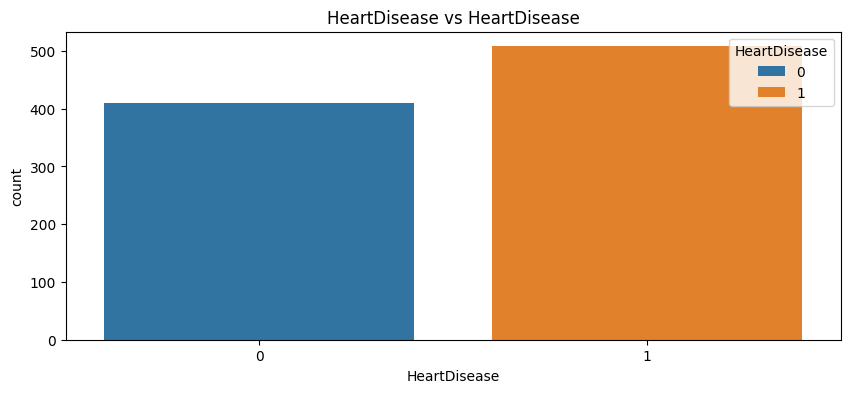

In [94]:
if __name__ == "__main__":
    main()